# Бинарная классификация данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

Сгенерируем датасет с заданными признаками. Промоделируем ситуацию, что некоторые данные будут некорректными

In [2]:
np.random.seed(0)

In [3]:
def generate_dataset(n, missing_prob=0.1):
    # Генерация случайных значений для размера
    sizes = np.random.rand(n) * 100
    #Замусоривание данных
    sizes[np.random.rand(n) < missing_prob] = np.nan
    # Определение цветов
    colors = ["красный", "синий", "зеленый", "желтый", "черный"]
    color_choices = np.random.choice(colors, n)
    color_choices[np.random.rand(n) < missing_prob] = np.nan
    # Определение форм букв
    fonts = ["comic sans", "times new roman", "golos"]
    font_choices = np.random.choice(fonts, n)
    font_choices[np.random.rand(n) < missing_prob] = np.nan
    # Генерация случайных значений для запаха чернил
    ink_smells = np.random.randn(n)
    ink_smells[np.random.rand(n) < missing_prob] = np.nan 

    dataset = pd.DataFrame({
        'Размер': sizes,
        'Цвет': color_choices,
        'Форма букв': font_choices,
        'Запах чернил': ink_smells
    })

    return dataset

In [4]:
n = 1000
dataset = generate_dataset(n)

In [5]:
print(dataset)

        Размер     Цвет       Форма букв  Запах чернил
0    54.881350   желтый       comic sans      0.441869
1          NaN   желтый            golos     -0.816861
2    60.276338   желтый  times new roman      0.745505
3    54.488318   черный       comic sans      0.454029
4          NaN    синий       comic sans      1.398363
..         ...      ...              ...           ...
995   9.767637    синий  times new roman      1.828015
996  51.492220  зеленый  times new roman      1.641788
997  93.841202    синий            golos     -1.325293
998  22.864655  красный            golos      0.123541
999  67.714114  зеленый              nan           NaN

[1000 rows x 4 columns]


Проведём предобработку данных

In [6]:
def preprocess_data(df):
    df_cleaned = df.dropna()

    # Кодировка текстовых данных
    label_encoder_color = LabelEncoder()
    label_encoder_font = LabelEncoder()

    df_cleaned['Цвет'] = label_encoder_color.fit_transform(df_cleaned['Цвет'])
    df_cleaned['Форма букв'] = label_encoder_font.fit_transform(df_cleaned['Форма букв'])

    return df_cleaned

In [7]:
data = preprocess_data(dataset)

C:\Users\roman\AppData\Local\Temp\ipykernel_24736\76732502.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Цвет'] = label_encoder_color.fit_transform(df_cleaned['Цвет'])
C:\Users\roman\AppData\Local\Temp\ipykernel_24736\76732502.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Форма букв'] = label_encoder_font.fit_transform(df_cleaned['Форма букв'])


In [8]:
print(data)

        Размер  Цвет  Форма букв  Запах чернил
0    54.881350     1           0      0.441869
2    60.276338     1           3      0.745505
3    54.488318     5           0      0.454029
6    43.758721     5           3      1.214608
8    96.366276     2           0     -0.159230
..         ...   ...         ...           ...
994  73.685316     2           1     -0.605418
995   9.767637     4           3      1.828015
996  51.492220     2           3      1.641788
997  93.841202     4           1     -1.325293
998  22.864655     3           1      0.123541

[801 rows x 4 columns]


Добавим произвольную разметку данных, если метка 0, то свиток полезен, если 1, то бесполезен

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def add_binary_label(df):
    df_ = df.copy(deep=True)
    df_['label'] = (sigmoid(-np.sqrt(df_['Размер']) - df_['Цвет'] + 
                           3 * df_['Форма букв'] + 
                           np.abs(df_['Запах чернил']) - 0.5) > 0.5).astype(int)
    return df_

In [10]:
data = add_binary_label(data)

In [11]:
print(data)

        Размер  Цвет  Форма букв  Запах чернил  label
0    54.881350     1           0      0.441869      0
2    60.276338     1           3      0.745505      1
3    54.488318     5           0      0.454029      0
6    43.758721     5           3      1.214608      0
8    96.366276     2           0     -0.159230      0
..         ...   ...         ...           ...    ...
994  73.685316     2           1     -0.605418      0
995   9.767637     4           3      1.828015      1
996  51.492220     2           3      1.641788      1
997  93.841202     4           1     -1.325293      0
998  22.864655     3           1      0.123541      0

[801 rows x 5 columns]


In [12]:
count_label_0 = (data['label'] == 0).sum()
print(f'Количество строк, где label = 0: {count_label_0}')

Количество строк, где label = 0: 641


Разделим данные на тренировочные и тестовые

In [13]:
X = data.drop('label', axis=1)
y = data['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Во сне профессору пришло наваждение, что нужно использовать логистическую регрессию по той причине, что наша классификация является бинарной, потому логистические регрессоры хорошо подходят для подобных задач

In [14]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

Оценим модель

In [15]:
y_pred_proba = classifier.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

accuracy = accuracy_score(y_test, classifier.predict(X_test))
report = classification_report(y_test, classifier.predict(X_test))
conf_matrix = confusion_matrix(y_test, classifier.predict(X_test))

In [16]:
print(f'Точность модели: {accuracy:.2f}')
print('Отчет о классификации:\n', report)
print('Матрица ошибок:\n', conf_matrix)

Точность модели: 0.97
Отчет о классификации:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       137
           1       0.88      0.92      0.90        24

    accuracy                           0.97       161
   macro avg       0.93      0.95      0.94       161
weighted avg       0.97      0.97      0.97       161

Матрица ошибок:
 [[134   3]
 [  2  22]]


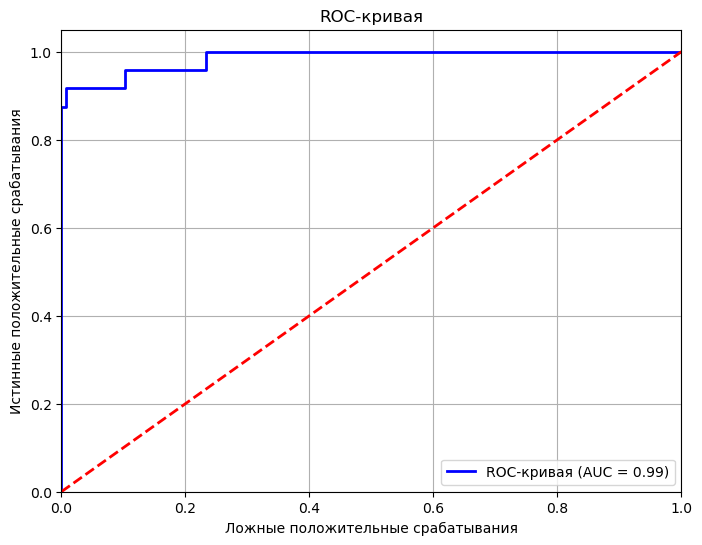

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Построение графика ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC-кривая (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Линия случайного угадывания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложные положительные срабатывания')
plt.ylabel('Истинные положительные срабатывания')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [19]:
tn, fp, fn, tp = confusion_matrix(y_test, classifier.predict(X_test)).ravel()
fpr = (fp / (fp + tn)) * 100 if (fp + tn) > 0 else 0
fnr = (fn / (tp + fn)) * 100 if (tp + fn) > 0 else 0

print(f'Процент ложноположительных предсказаний: {fpr:.2f}%')
print(f'Процент ложноотрицательных предсказаний: {fnr:.2f}%')

Процент ложноположительных предсказаний: 2.19%
Процент ложноотрицательных предсказаний: 8.33%


Как можем видеть, с большой долей вероятности полученный классификатор даёт истинные предсказания. Ложноположительных результатов 2%, а ложноотрицательных 8%

Теперь этот классификатор можно отдать учёному-алхимику на помощь